In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns


import numpy as np 
import pandas as pd

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import random as rn

import re
from bs4 import BeautifulSoup
import bert
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt



In [1]:
import pandas as pd
data = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [2]:
data['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [3]:
data.isna().sum()

Review    0
Rating    0
dtype: int64

In [4]:
data['Rating'].unique()

array([4, 2, 3, 5, 1])

In [5]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

<AxesSubplot:>

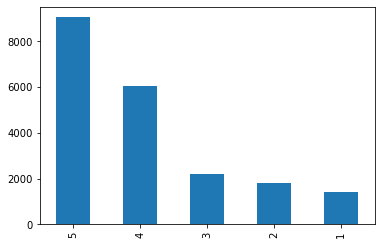

In [6]:
data['Rating'].value_counts().plot(kind = 'bar')

In [7]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gaurijare/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gaurijare/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
example_sent = " ".join(data.Review)
 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 

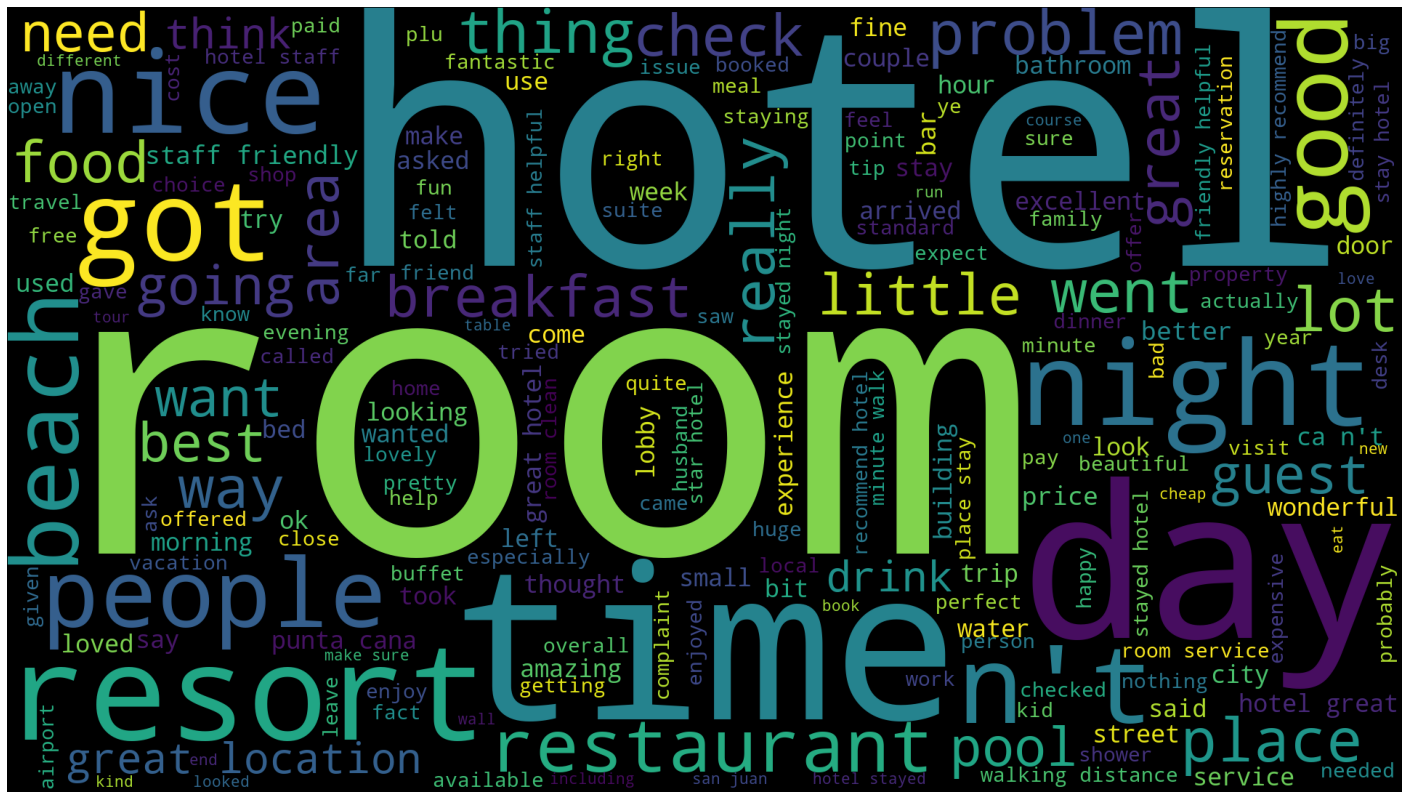

In [9]:
import matplotlib.pyplot as plt

final = " ".join(filtered_sentence)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(final)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [10]:
x = data['Review']
y = data['Rating']


In [11]:
import re
def clean(review):
    review = re.sub(r'\d+', ' ', review)
    
    review = review.split()
    review = " ".join([word for word in review if not word in stop_words])
    return review

stop_words = stopwords.words('english')
X_clean = x.apply(clean)

In [12]:
X_clean

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms * experience hotel monaco seattle g...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret rd time staying charm, -star ...
20487    great location price view hotel great quick pl...
20488    ok looks nice modern outside, desk staff n't p...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [13]:

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

# Updates internal vocabulary based on a list of texts. In the case where texts contains lists, we assume each entry of the lists to be a token.
# Required before using texts_to_sequences or texts_to_matrix.
tokenizer.fit_on_texts(X_clean)
X = tokenizer.texts_to_sequences(X_clean)
vocab_size = len(tokenizer.word_index)+1
max_length = max([len(x) for x in X])

tokenizer.word_index

In [1]:
exp_sen = 1
print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))
print("\nExample:\n")
print("Sentence:\n{}".format(X_clean[exp_sen]))
print("\nAfter tokenizing :\n{}".format(X[exp_sen]))

X = pad_sequences(X, padding='post', maxlen=350)
print("\nAfter padding :\n{}".format(X[exp_sen]))

In [ ]:
len(X[exp_sen])

In [ ]:
len(X_clean[exp_sen])

In [ ]:
encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }

labels = ['1', '2', '3', '4', '5']
           
y = data['Rating'].copy()
y.replace(encoding, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=67, stratify=y)

In [ ]:
# hyper parameters
EPOCHS = 3
BATCH_SIZE = 100
embedding_dim = 16
units = 76

model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(units,return_sequences=True)),
    #L.LSTM(units,return_sequences=True),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.5),
    L.Dense(128, activation="relu"),
    L.Dropout(0.5),
    L.Dense(64, activation="relu"),
    L.Dropout(0.5),
    L.Dense(5, activation="softmax")
])


model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.12, batch_size=BATCH_SIZE, verbose=2)

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)


In [ ]:
classes_x

In [ ]:
accuracy_score(classes_x, y_test)

In [ ]:
print(classification_report(y_test, classes_x, target_names=labels))

In [ ]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [ ]:
df['Rating'] = df['Rating'].apply(lambda x: 1 if x >= 2 else 0) 

In [ ]:
positive = df[df['Rating'] == 1 ]
negative = df[df['Rating'] == 0]

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(positive['Review']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['Review']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
def clean_t(t):
    t = BeautifulSoup(t, 'lxml').get_text()
    t = re.sub(r"@[A-Za-z0-9]+", ' ', t)
    t = re.sub(r"https?://[A-Za-z0-9./]+", ' ', t)
    t = re.sub(r"[^a-zA-Z.!?]", ' ', t)
    t = re.sub(r" +", ' ', t)
    return t

In [ ]:
test = '99 ' + df.Review[0]
test

In [ ]:
result = clean_t(test)
result

In [ ]:
data_clean = [clean_t(t) for t in df.Review]

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1', trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [ ]:
vocab_file

In [ ]:
len(tokenizer.vocab)

In [ ]:
tokenizer.tokenize('My dog likes strawberries.')

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize('My dog likes strawberries.'))


In [ ]:
def encode_sentence(sent):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sent))

In [ ]:
encode_sentence('my dog likes strawberries')

In [ ]:
data_inputs = [encode_sentence(sentence) for sentence in data_clean]

In [ ]:
data_labels = df.iloc[:,1].values
data_labels

In [ ]:
data_with_len = [[sent, data_labels[i], len(sent)]
                 for i, sent in enumerate(data_inputs)]

In [ ]:
rn.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])


In [ ]:
sorted_all = [(sent_lab[0], sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 7]

In [ ]:
all_dataset = tf.data.Dataset.from_generator(lambda: sorted_all,
                                             output_types = (tf.int32, tf.int32))

In [ ]:
next(iter(all_dataset))

In [ ]:
BATCH_SIZE = 32
all_batched = all_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [ ]:
len(sorted_all)

In [ ]:
NB_BATCHES = len(sorted_all) // BATCH_SIZE
NB_BATCHES

In [ ]:
NB_BATCHES_TEST = NB_BATCHES // 10
NB_BATCHES_TEST

In [ ]:
all_batched.shuffle(NB_BATCHES)
test_dataset = all_batched.take(NB_BATCHES_TEST)
train_dataset = all_batched.skip(NB_BATCHES_TEST)

In [ ]:
class DCNN(tf.keras.Model):
    def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters = 50,
               FFN_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=False,
               name="dcnn"):
        super(DCNN, self).__init__(name=name)

        self.embedding = layers.Embedding(vocab_size, emb_dim)

        self.bigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 2,
                                padding='valid',
                                activation='relu')
        self.trigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 3,
                                padding='valid',
                                activation='relu')
        self.fourgram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 4,
                                padding='valid',
                                activation='relu')
    
        self.pool = layers.GlobalMaxPool1D()

        self.dense_1 = layers.Dense(units = FFN_units, activation='relu')
        self.dropout = layers.Dropout(rate=dropout_rate)
        if nb_classes == 2:
              self.last_dense = layers.Dense(units=1, activation='sigmoid')
        else:
              self.last_dense = layers.Dense(units=nb_classes, activation='softmax')

    def call(self, inputs, training):
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)

        merged = tf.concat([x_1, x_2, x_3], axis = -1)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)

        return output

In [ ]:
VOCAB_SIZE = len(tokenizer.vocab)
EMB_DIM = 200
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 12

In [ ]:
Dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters = NB_FILTERS,
            FFN_units = FFN_UNITS,
            nb_classes = NB_CLASSES,
            dropout_rate = DROPOUT_RATE)

In [ ]:
if NB_CLASSES == 2:
      Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
      Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [ ]:
history = Dcnn.fit(train_dataset,
                   epochs=NB_EPOCHS)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss progress');

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy progress');

In [ ]:
results = Dcnn.evaluate(test_dataset)
print(results)

In [ ]:
def get_prediction(sentence):
    tokens = encode_sentence(sentence)
    inputs = tf.expand_dims(tokens, 0)
    output = Dcnn(inputs, training=False)
    sentiment = math.floor(output*2)
    if sentiment == 0:
        print('negative')
    elif sentiment == 1:
        print('positive')

In [ ]:
get_prediction('This movie was pretty interesting')


In [ ]:
get_prediction("I'd rather not do that again")


In [ ]:
get_prediction("I don't like you")